In [49]:
import pandas as pd

df = pd.read_csv("../data/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [50]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
# Columns where zero is invalid
zero_invalid_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Count zeros
for col in zero_invalid_cols:
    print(f"{col} has {df[df[col]==0].shape[0]} zero values.")


Glucose has 5 zero values.
BloodPressure has 35 zero values.
SkinThickness has 227 zero values.
Insulin has 374 zero values.
BMI has 11 zero values.


In [52]:
# Replace 0 with median in the invalid columns
for col in zero_invalid_cols:
    median_val = df[df[col] != 0][col].median()
    df[col] = df[col].replace(0, median_val)


<Figure size 640x480 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

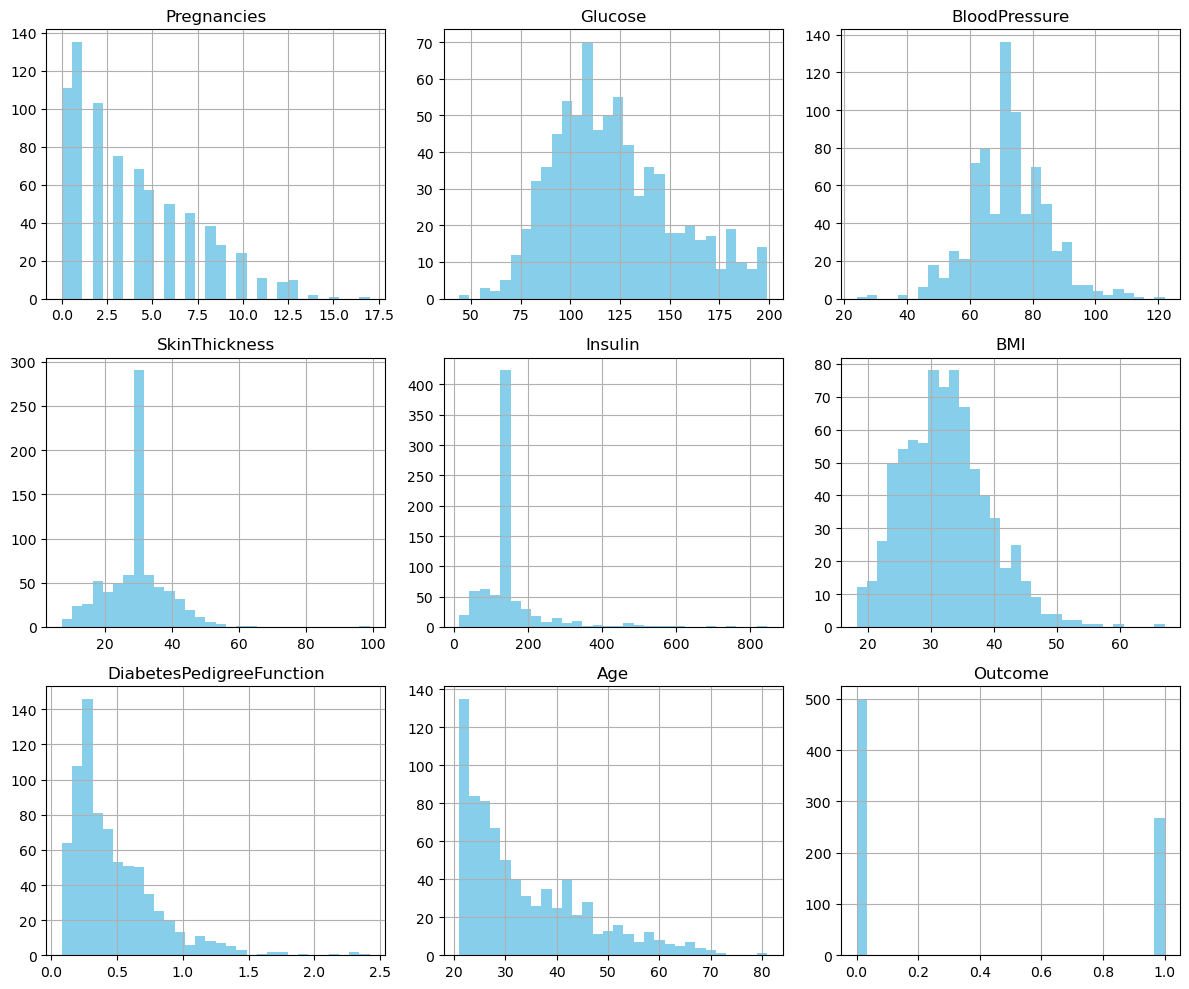

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for all features
df.hist(bins=30, figsize=(12, 10), color='skyblue')
plt.tight_layout()
plt.show()


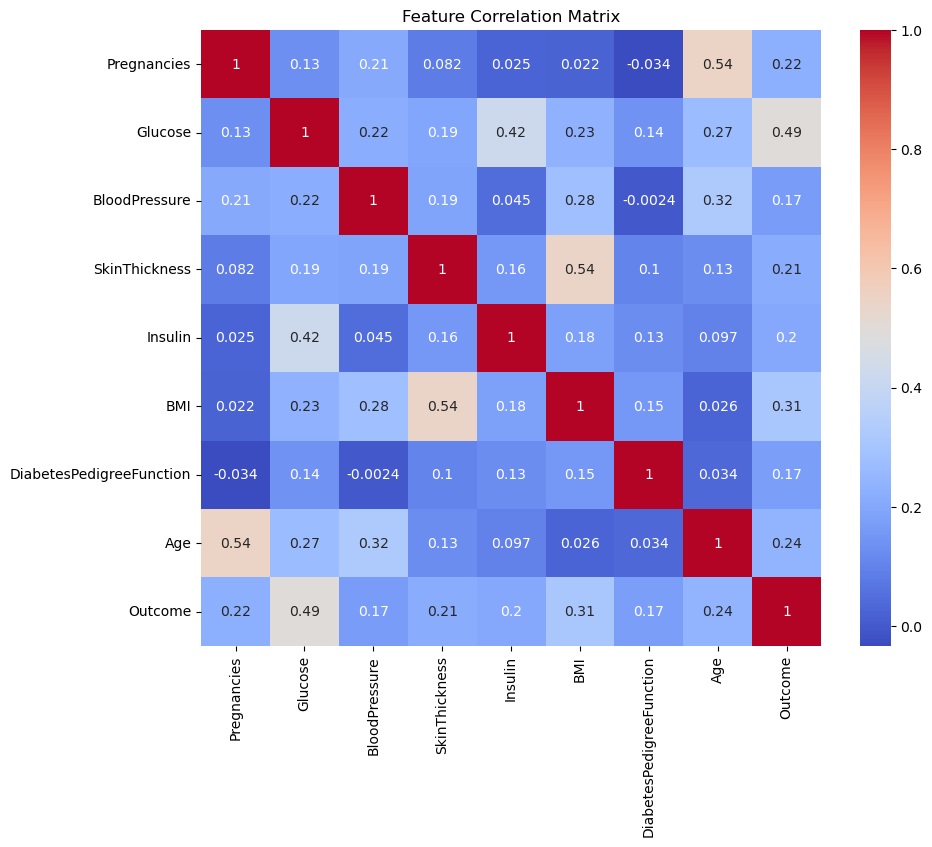

In [54]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Matrix")
plt.show()


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split X and y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import joblib

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Dictionary to store performance
results = {}

# Training loop
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"\n🔍 {name} Performance:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

    # Save model score
    results[name] = roc_auc_score(y_test, y_prob)



🔍 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154

ROC-AUC Score: 0.8127777777777777

🔍 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154

ROC-AUC Score: 0.8190740740740741


C:\Users\mahip\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:13:44] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



🔍 XGBoost Performance:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       100
           1       0.67      0.61      0.64        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

ROC-AUC Score: 0.8081481481481482


In [57]:
# Select best model
best_model_name = max(results, key=results.get)
best_model = models[best_model_name]

print(f"✅ Best Model: {best_model_name} with ROC-AUC = {results[best_model_name]:.2f}")

# Save it
joblib.dump(best_model, f"../model/{best_model_name.replace(' ', '_').lower()}_model.pkl")
joblib.dump(scaler, "../model/scaler.pkl")


✅ Best Model: Random Forest with ROC-AUC = 0.82


['../model/scaler.pkl']

In [59]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Load the best model and scaler
import joblib
model = joblib.load("../model/random_forest_model.pkl")  # Use your saved model filename
scaler = joblib.load("../model/scaler.pkl")


ExactExplainer explainer: 155it [00:33,  3.26it/s]                         


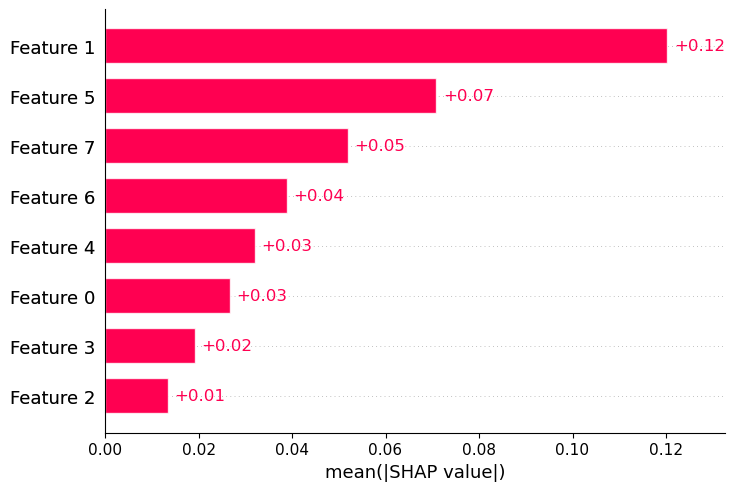

In [18]:
import shap
explainer = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer(X_test)

# For class 1 explanation (binary classifier)
shap.plots.bar(shap_values[:, :, 1])  # bar for class 1

# Force plot for one instance
shap.initjs()
shap.plots.force(shap_values[5, :, 1])


In [60]:
import joblib
import numpy as np
import shap

# Load model and scaler
model = joblib.load("../model/random_forest_model.pkl")
scaler = joblib.load("../model/scaler.pkl")

# Example patient input (same order as dataset)
patient_data = {
    "Pregnancies": 2,
    "Glucose": 130,
    "BloodPressure": 70,
    "SkinThickness": 25,
    "Insulin": 100,
    "BMI": 28.5,
    "DiabetesPedigreeFunction": 0.6,
    "Age": 35
}

# Convert to DataFrame
import pandas as pd
X_patient = pd.DataFrame([patient_data])
X_scaled = scaler.transform(X_patient)

# Predict
pred = model.predict(X_scaled)[0]
prob = model.predict_proba(X_scaled)[0][1]

print(f"Prediction: {'Diabetic' if pred else 'Non-Diabetic'} ({prob:.2f} probability)")


Prediction: Diabetic (0.52 probability)


In [61]:
import shap
import matplotlib.pyplot as plt

# Select the first sample
sample_idx = 0

# Generate force plot for class 1 (e.g., diabetic)
shap.initjs()
plt.figure()

shap.plots.force(
    base_value=explainer.expected_value[1],             # For class 1 (diabetic)
    shap_values=shap_values.values[sample_idx][:, 1],   # SHAP values for class 1
    features=shap_values.data[sample_idx],              # Patient's feature data
    matplotlib=True,
    show=False
)

plt.savefig("../reports/force_plot.png", bbox_inches='tight')
plt.close()


In [63]:
from fpdf import FPDF
from datetime import datetime
import uuid
import matplotlib.pyplot as plt
import shap

# Example: Generate unique report ID and current timestamp
report_id = str(uuid.uuid4())[:8]
report_date = datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# Example risk level based on probability thresholds
if prob > 0.75:
    risk_level = "High Risk"
    explanation_text = "Your health parameters strongly indicate diabetes risk."
elif prob > 0.4:
    risk_level = "Moderate Risk"
    explanation_text = "You have a moderate risk of diabetes; consider lifestyle changes."
else:
    risk_level = "Low Risk"
    explanation_text = "Your risk for diabetes is low based on current data."

# Assume you have global SHAP values plot saved as:
# shap.plots.bar(explainer(X_train), max_display=10, show=False)
# plt.savefig("reports/global_feature_importance.png")
# plt.close()

class PDFReport(FPDF):
    def header(self):
        self.set_font("Arial", "B", 16)
        self.cell(0, 10, "Diabetes Prediction Report", ln=True, align="C")

    def footer(self):
        self.set_y(-15)
        self.set_font("Arial", "I", 8)
        self.cell(0, 10, "Generated by AI-Powered Health System", align="C")

pdf = PDFReport()
pdf.add_page()

# Report Metadata
pdf.set_font("Arial", "", 12)
pdf.cell(0, 8, f"Report ID: {report_id}", ln=True)
pdf.cell(0, 8, f"Date: {report_date}", ln=True)
pdf.ln(5)

# Patient Info
pdf.cell(0, 10, "Patient Health Parameters:", ln=True)
for key, value in patient_data.items():
    pdf.cell(0, 8, f"{key}: {value}", ln=True)
pdf.ln(5)

# Prediction Result
pdf.set_font("Arial", "B", 12)
result_text = "Diabetic" if pred else "Non-Diabetic"
pdf.set_text_color(255, 0, 0) if pred else pdf.set_text_color(0, 128, 0)
pdf.cell(0, 10, f"Prediction: {result_text}", ln=True)
pdf.set_text_color(0, 0, 0)
pdf.cell(0, 10, f"Probability: {prob:.2f}", ln=True)
pdf.cell(0, 10, f"Risk Level: {risk_level}", ln=True)
pdf.ln(5)

# Interpretation text
pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 8, f"Interpretation: {explanation_text}")
pdf.ln(5)

# Health Recommendations (customize based on patient_data)
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Health Recommendations:", ln=True)
pdf.set_font("Arial", "", 12)
if patient_data.get("BMI", 0) > 25:
    pdf.multi_cell(0, 8, "- Consider weight management and regular exercise.")
if patient_data.get("Glucose", 0) > 125:
    pdf.multi_cell(0, 8, "- Monitor your blood sugar levels regularly.")
pdf.multi_cell(0, 8, "- Maintain a healthy diet rich in fiber and low in sugar.")
pdf.ln(5)

# Model Performance Metrics (fill in your real metrics)
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "Model Performance Metrics:", ln=True)
pdf.set_font("Arial", "", 12)
pdf.cell(0, 8, "Accuracy: 0.85", ln=True)
pdf.cell(0, 8, "Precision: 0.82", ln=True)
pdf.cell(0, 8, "Recall: 0.79", ln=True)
pdf.cell(0, 8, "ROC-AUC: 0.88", ln=True)
pdf.ln(5)



# Patient-specific SHAP force plot
pdf.cell(0, 10, "Patient Specific Explanation (SHAP Force Plot):", ln=True)
pdf.image("../reports/force_plot.png", x=10, w=180)
pdf.set_font("Arial", "B", 12)
pdf.cell(0, 10, "SHAP Interpretation (What It Indicates):", ln=True)

pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 8,
    "SHAP (SHapley Additive exPlanations) values help explain how each health parameter "
    "influenced the model's prediction for this patient.\n\n"
    "A positive SHAP value means the feature pushed the prediction towards 'Diabetic'.\n"
    "A negative SHAP value means the feature pushed the prediction towards 'Non-Diabetic'.\n\n"
    "- In the force plot, each colored bar represents a feature's contribution:\n"
    "    1. Red: pushed the risk **higher** (towards diabetic)\n"
    "    2. Blue: pushed the risk **lower** (towards non-diabetic)\n"
    "- The size of each bar shows the strength of its impact.\n\n"
    "This allows patients and doctors to see which specific health values (like glucose, BMI, insulin) "
    "were most responsible for the prediction."
)
pdf.ln(5)


# Save PDF
pdf.output("../reports/patient_diabetes_report_enhanced.pdf")
print("✅ Enhanced patient report generated!")


✅ Enhanced patient report generated!


In [64]:
import pickle

# Save to file
with open("../shap/explainer.pkl", "wb") as f:
    pickle.dump(explainer, f)

print("✅ SHAP explainer saved to shap/explainer.pkl")


✅ SHAP explainer saved to shap/explainer.pkl


In [65]:
model_path = "../model/random_forest_model.pkl"

with open(model_path, "rb") as f:
    print("First 10 bytes:", f.read(10))


First 10 bytes: b'\x80\x04\x95\x86\x03\x00\x00\x00\x00\x00'


In [67]:
import joblib

model_path = "../model/random_forest_model.pkl"
model = joblib.load(model_path)


In [1]:
import shap
print("SHAP version:", shap.__version__)


SHAP version: 0.47.2


NameError: name 'base_value' is not defined